# Milan AirBnB Exploratory data analysis  
An exercise developed for CodeOp Module 3 milestone  

- Author: Margherita Serena Ferrara  
- Date: 25/11/2023  
- Contact: margheritaserena.ferrara@gmail.com

## [introduction]
- data source
- type of analysis performed
-- sections

## [main findings]

## Section 1: Import data & clean data

[which files we import]

### [Set up]

In [239]:
# Import revelant packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import folium
import os
from folium.plugins import HeatMap

In [240]:
# Get folder paths
analysis_directory = os.getcwd()
parent_folder = os.path.dirname(analysis_directory)

### Listings  
[dataset shoudl contain all listings in Milan]

#### Import dataset

In [241]:
listings = pd.read_csv(parent_folder+'/MI AirBnB - dataset/listings.csv', delimiter = ',')

#### Explore data available
[identify varuiables of interest,
check whether variables need cleaning (NAs, weird symbols, convert in str/date etc)
]

In [242]:
# Explore the data
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24177 entries, 0 to 24176
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            24177 non-null  int64  
 1   listing_url                                   24177 non-null  object 
 2   scrape_id                                     24177 non-null  int64  
 3   last_scraped                                  24177 non-null  object 
 4   source                                        24177 non-null  object 
 5   name                                          24177 non-null  object 
 6   description                                   23761 non-null  object 
 7   neighborhood_overview                         13101 non-null  object 
 8   picture_url                                   24177 non-null  object 
 9   host_id                                       24177 non-null 

##### Unique identifier  
[helpful to have unique identifier in teh dataset.
expert to be id]
we know there are 24177 entries

In [243]:
listings['id'].nunique() == listings.shape[0]

True

conclusion: all is good

#### Missing values
[description]

##### Drop fully missing variables
info() suggests that some variables are fully missing (such as neighbourhood). 
We drop these.

In [244]:
listings = listings.dropna(axis=1, how='all')

##### Explore other variables that contain NAs

In [245]:
listings.columns[listings.isna().any()]

Index(['description', 'neighborhood_overview', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'neighbourhood',
       'bathrooms_text', 'bedrooms', 'beds', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'reviews_per_month'],
      dtype='object')

One of the variables that contain NA values is 'bedrooms'
Explore this further

In [246]:
listings['bedrooms'].value_counts(dropna=False)


bedrooms
1.0     14361
NaN      5430
2.0      3657
3.0       587
4.0       103
5.0        27
6.0         5
7.0         3
10.0        2
8.0         1
11.0        1
Name: count, dtype: int64

In [247]:
listings.groupby('room_type')['bedrooms'].value_counts(dropna=False)

room_type        bedrooms
Entire home/apt  1.0         13972
                 2.0          3642
                 NaN          1402
                 3.0           584
                 4.0           102
                 5.0            23
                 6.0             3
                 10.0            2
                 7.0             1
                 8.0             1
Hotel room       1.0            24
                 3.0             2
                 5.0             1
                 2.0             1
Private room     NaN          3762
                 1.0           365
                 2.0            14
                 5.0             3
                 7.0             2
                 6.0             2
                 3.0             1
                 4.0             1
                 11.0            1
Shared room      NaN           266
Name: count, dtype: int64

5430 listings are registered with 0 bedrooms.
AirBnB website allows to select listings that have 1 or more bedrooms. 1 bedrooms listings also include studios.
> Decision: drop these observations

In [248]:
#Store these observations in another dataset
listings_no_bedroom = listings[listings['bedrooms'].isna()]

listings = listings.dropna(subset=['bedrooms'])
# Check that observations have been dropped
listings[listings['bedrooms'].isna()]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month


Go back to list of NA variables

In [249]:
listings.columns[listings.isna().any()]

Index(['description', 'neighborhood_overview', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'neighbourhood',
       'bathrooms_text', 'beds', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'reviews_per_month'],
      dtype='object')

they seem okay

#### Format variables
[description]

based on listings info notice two formatting to do:
price
calendar_last_scraped - not interested  

we explore price

In [250]:
listings['price']

1        $150.00
2        $171.00
3         $40.00
4         $94.00
6        $220.00
          ...   
24172     $90.00
24173    $119.00
24174    $113.00
24175     $83.00
24176     $96.00
Name: price, Length: 18747, dtype: object

need to remove dollar sign and convert into float

In [251]:
listings['price'] = listings['price'].str.replace('$', '')
# The variable price can't be immediately converted as float because the symbol ',' is not considered numerical.
listings['price'] = listings['price'].str.replace(',', '').astype(float)

# Note: quicker way to achieve this would have been with 
#   calendar['adjusted_price'] = calendar['adjusted_price'].replace('[$,]', '', regex=True).astype(float)

[conclusion: initial data cleaning of dataset listings is completed]

#### Outliers

Explore price to identify outliers

<Axes: ylabel='price'>

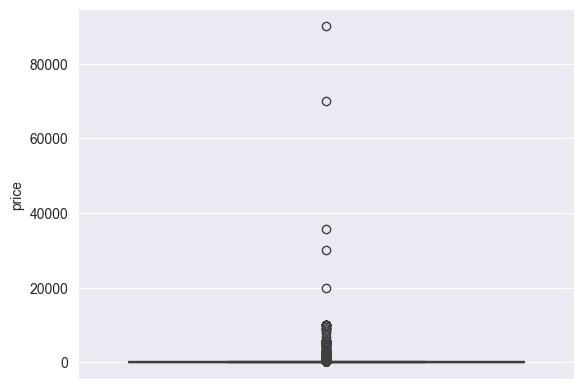

In [252]:
sns.boxplot(
    data = listings,
    y = 'price'
)

In [253]:
listings['price'].describe()

count    18747.00000
mean       206.14333
std        989.37974
min         10.00000
25%         90.00000
50%        128.00000
75%        200.00000
max      90000.00000
Name: price, dtype: float64

In [254]:
listings['price'].median()

128.0

Looked on airbnb and Milan's most expensive listing on the website (available any time) is around 2000.
Use 3000 as threshold

In [255]:
listings_no_outliers = listings[listings['price'] <= 3000]

<Axes: ylabel='price'>

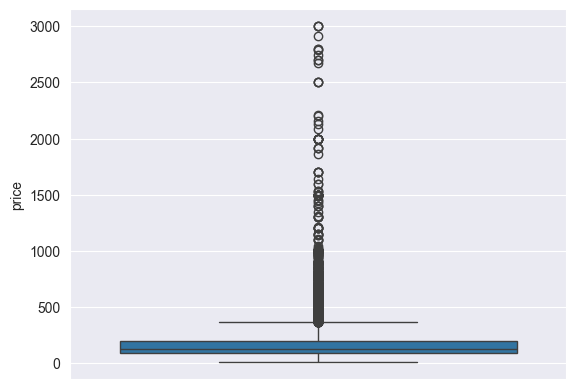

In [256]:
sns.boxplot(
    data = listings_no_outliers,
    y = 'price'
)

Still odd.
Use Inter quartile rule

In [257]:
# Calculate the IQR (Interquartile Range)
Q1 = listings['price'].quantile(0.25)
Q3 = listings['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to exclude outliers
listings_no_outliers = listings[(listings['price'] >= lower_bound) & (listings['price'] <= upper_bound)]

Visualise how data distribution changed

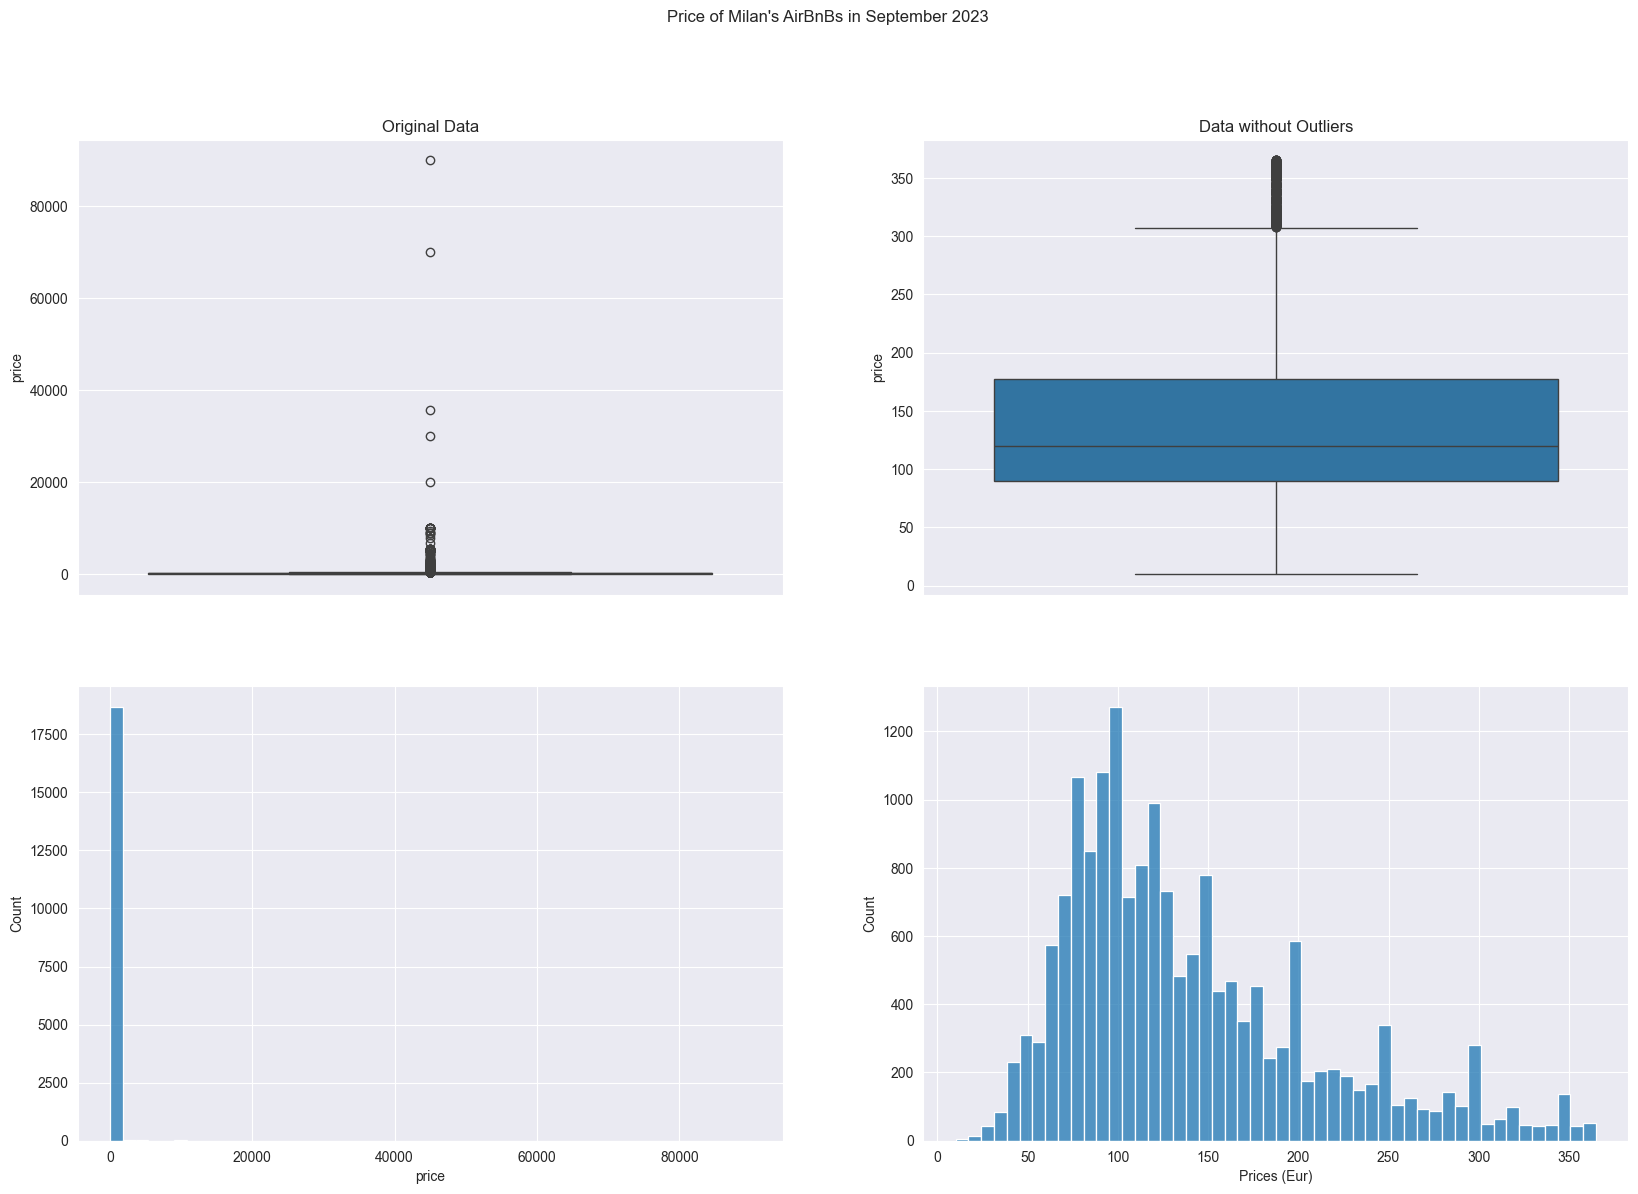

In [258]:
# Define the "subplot".
fig, axes = plt.subplots(
    nrows=2, 
    ncols=2,
    figsize=(20,13)
)

# Set up a stype
sns.set_style("darkgrid")

# Let's add a general title.
fig.suptitle("Price of Milan's AirBnBs in September 2023")

# Add subtitles to each subplot
axes[0,0].set_title("Original Data")
axes[0,1].set_title("Data without Outliers")

sns.boxplot(
    data = listings,
    y = 'price',
    ax = axes[0,0]
)

sns.boxplot(
    data = listings_no_outliers,
    y = 'price',
    ax = axes[0,1]
)

sns.histplot(
    data=listings, 
    x="price",
    bins = 50,
    ax = axes[1,0]
    )


sns.histplot(
    data=listings_no_outliers, 
    x="price",
    bins = 50,
    ax = axes[1,1]
    )

# label axis
_ =  plt.xlabel('Prices (Eur)')
_ = plt.ylabel('Count')

Data looks better now

In [259]:
# Rename datasets for ease
listings_incl_outliers = listings.copy()  # Create a copy to avoid modifying the original DataFrame
listings = listings_no_outliers.copy()  # Create a copy to avoid modifying the original DataFrame

### Calendar

#### Import dataset

In [260]:
calendar = pd.read_csv(parent_folder+'/MI AirBnB - dataset/calendar.csv')

#### Explore data available

In [261]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8824261 entries, 0 to 8824260
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 471.3+ MB


In [262]:
# Price, price_adjusted and date are identified as objects
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,6400,2023-09-14,f,$100.00,$100.00,4.0,5.0
1,6400,2023-09-15,f,$100.00,$100.00,4.0,5.0
2,6400,2023-09-16,f,$100.00,$100.00,4.0,5.0
3,6400,2023-09-17,f,$100.00,$100.00,4.0,5.0
4,6400,2023-09-18,f,$100.00,$100.00,4.0,5.0


#### Unique identifiers
This case probably not
check that listing_id is not missing

In [263]:
calendar[calendar['listing_id'].isna()]

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights


No obs with missing id - good

In [264]:
calendar['listing_id'].nunique()

24177

#### Missing values

In [265]:
columns_with_na = calendar.columns[calendar.isna().any()]

print(columns_with_na)

Index(['price', 'adjusted_price', 'minimum_nights', 'maximum_nights'], dtype='object')


##### Drop fully missing variables

In [266]:
calendar = calendar.dropna(axis=1, how='all')
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8824261 entries, 0 to 8824260
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 471.3+ MB


calendar.info() shows that no variable was fully missing.
However, some variables have na values(). we explore them

##### Explore other variables that contain NAs

look at how many observations are missing

In [267]:
calendar[columns_with_na].isna().sum()

price             171
adjusted_price    171
minimum_nights     15
maximum_nights     15
dtype: int64

a relatively small amount of observations have nas.
we drop those rows with NA price

In [268]:
calendar = calendar.dropna(subset=['price'])

In [269]:
calendar[columns_with_na].isna().sum()

price              0
adjusted_price     0
minimum_nights    15
maximum_nights    15
dtype: int64

same as price_adj - all good now

#### Format variables

price and date variables need formatting

In [270]:
calendar['price'] = calendar['price'].replace('[$,]', '', regex=True).astype(float)
calendar['adjusted_price'] = calendar['adjusted_price'].replace('[$,]', '', regex=True).astype(float)
calendar['date'] = pd.to_datetime(calendar['date'], format = "%Y-%m-%d")
calendar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8824090 entries, 0 to 8824260
Data columns (total 7 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   available       object        
 3   price           float64       
 4   adjusted_price  float64       
 5   minimum_nights  float64       
 6   maximum_nights  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 538.6+ MB


calendar.info()shows that the conversion worked

[data cleaning done - for now]

#### Outliers
We apply the same methodology

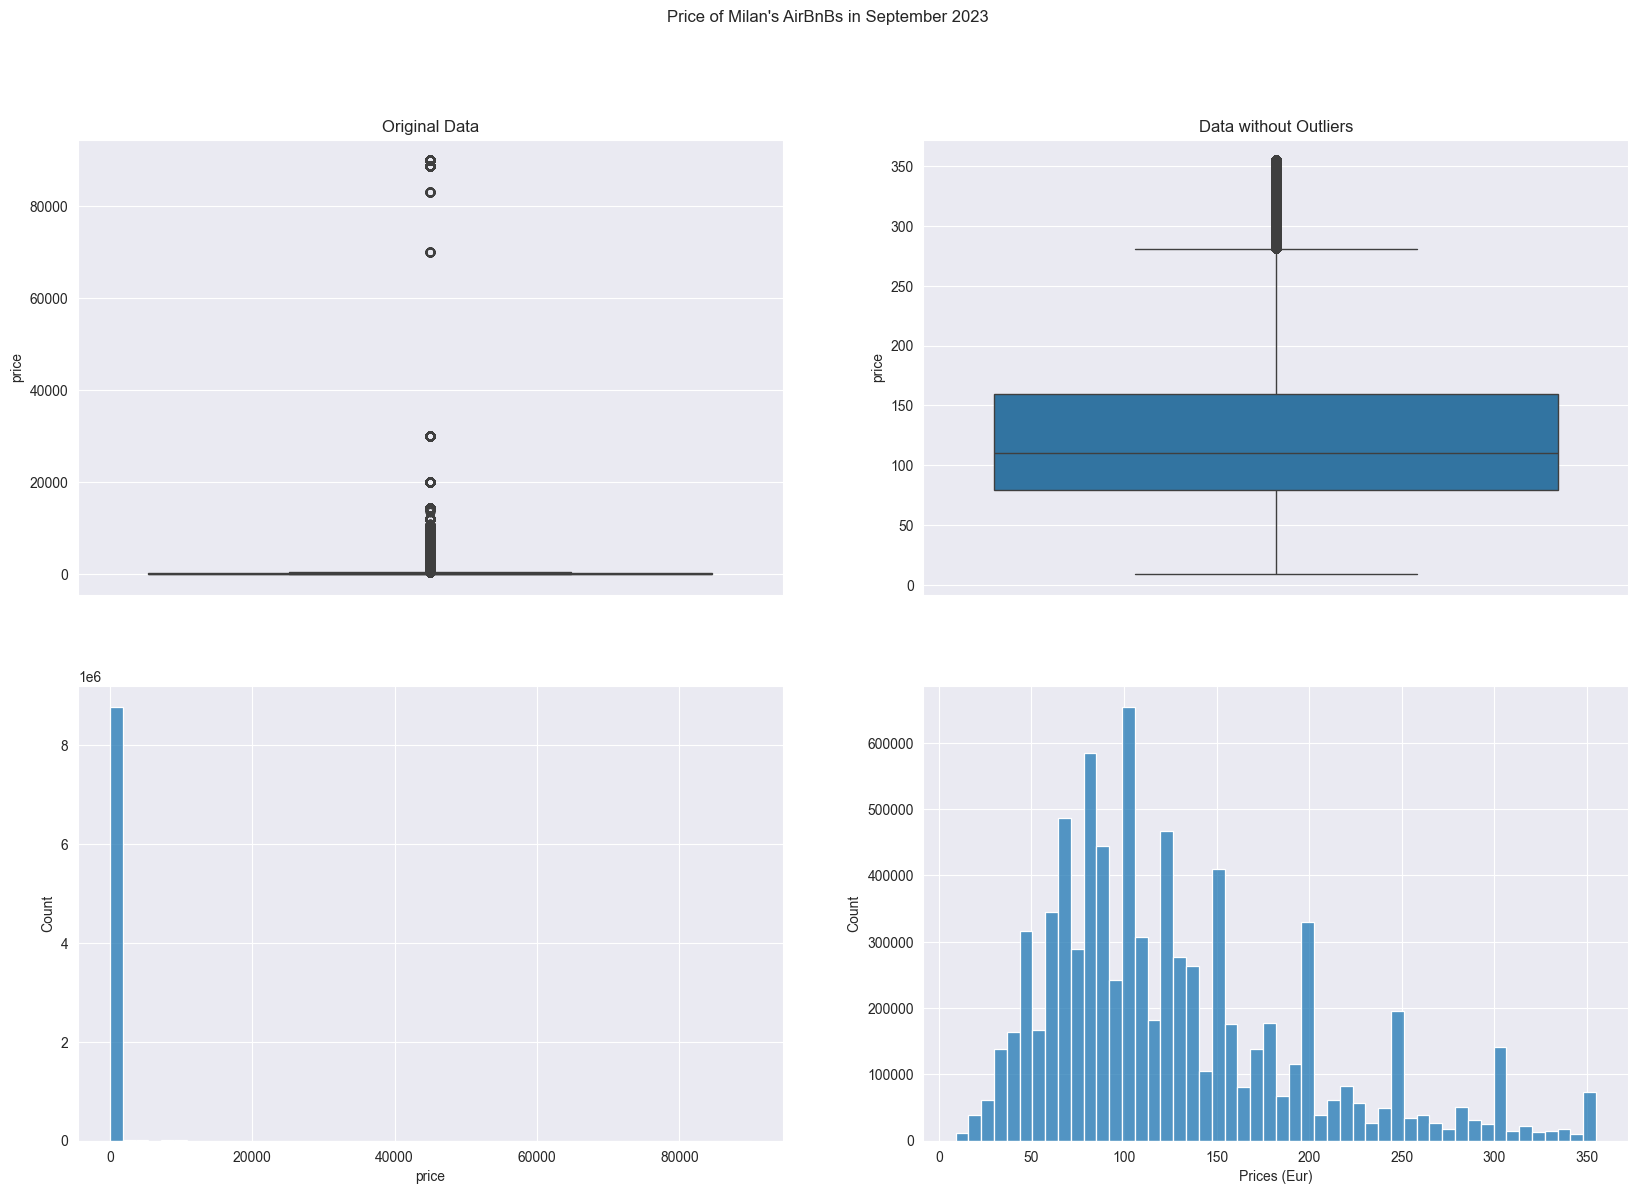

In [294]:
# Calculate the IQR (Interquartile Range)
Q1 = calendar['price'].quantile(0.25)
Q3 = calendar['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to exclude outliers
calendar_no_outliers = calendar[(calendar['price'] >= lower_bound) & (calendar['price'] <= upper_bound)]

# Define the "subplot".
fig, axes = plt.subplots(
    nrows=2, 
    ncols=2,
    figsize=(20,13)
)

# Set up a stype
sns.set_style("darkgrid")

# Let's add a general title.
fig.suptitle("Price of Milan's AirBnBs in September 2023")

# Add subtitles to each subplot
axes[0,0].set_title("Original Data")
axes[0,1].set_title("Data without Outliers")

sns.boxplot(
    data = calendar,
    y = 'price',
    ax = axes[0,0]
)

sns.boxplot(
    data = calendar_no_outliers,
    y = 'price',
    ax = axes[0,1]
)

sns.histplot(
    data=calendar, 
    x="price",
    bins = 50,
    ax = axes[1,0]
    )


sns.histplot(
    data=calendar_no_outliers, 
    x="price",
    bins = 50,
    ax = axes[1,1]
    )

# label axis
_ =  plt.xlabel('Prices (Eur)')
_ = plt.ylabel('Count')

## Section 2: Merge datasets

merge on variable listin_id

In [271]:
#first rename
listings = listings.rename(columns={'id': 'listing_id'})

mi_listings = pd.merge(listings, calendar, on='listing_id', how='outer', indicator=True)

how many observations were in common?
compare number of unique ids in the two datasets with those in the initial ones
mi_listings willhave same as listings
what about calendar?

In [272]:
mi_listings['_merge'].value_counts()

_merge
both          6335507
right_only    2488583
left_only           0
Name: count, dtype: int64

keep only vars in common`

In [273]:
# Extract calendar only data
right_only_data = mi_listings[mi_listings['_merge'] == 'right_only']['listing_id']
mi_listings = mi_listings[mi_listings['_merge'] == 'both']

### Cross checks

The additional listings in calendar are those of the observations we dropped with 0 bedrooms?
we check this comparing listings_no_bedroom and calendar

In [274]:
listings_no_bedroom = listings_no_bedroom.rename(columns={'id': 'listing_id'})
listings_no_bedroom_calendar = pd.merge(
    listings_no_bedroom['listing_id'], right_only_data,
    on = 'listing_id', how ='outer', indicator = True
    )

In [275]:
listings_no_bedroom_calendar['_merge'].value_counts()

_merge
both          1981598
right_only     506985
left_only           0
Name: count, dtype: int64

conclusion: ids dropped bc of no bedrooms  
same things with code below:
[listings_2 = listings_2.rename(columns = {'id':'listing_id'})
merge = pd.merge(
    listings_2['listing_id'], calendar,
    on = 'listing_id', how ='outer', indicator = True
    )
    listings_2 = pd.read_csv(parent_folder+'/MI AirBnB - dataset/listings.csv', delimiter = ',')

    merge['_merge'].unique()
    
    ]

## Section 3: Exploratory data analysis

### Local distribution of listings

How are distributed?
- hist of neighbourhoods and ids  
- map

In [276]:
listings['neighbourhood_cleansed'].value_counts()

neighbourhood_cleansed
BUENOS AIRES - VENEZIA    1312
DUOMO                      889
SARPI                      837
NAVIGLI                    749
LORETO                     732
                          ... 
MUGGIANO                     4
PARCO AGRICOLO SUD           3
SACCO                        3
PARCO NORD                   1
RONCHETTO DELLE RANE         1
Name: count, Length: 86, dtype: int64

In [277]:
# there are too many categories to do a countplot chart
# sns.countplot(
#     data=listings,
#     x='neighbourhood_cleansed')

In [278]:
# Import neighbourhoods
geojson_path = parent_folder+'/MI AirBnB - dataset/neighbourhoods.geojson'

In [279]:
# create summary table
neighborhood_counts = listings['neighbourhood_cleansed'].value_counts().reset_index()
neighborhood_counts.columns = ['neighbourhood', 'listing_count']

In [280]:
median_latitude = listings['latitude'].median()
median_longitude = listings['longitude'].median()

milan_map = folium.Map(
    # starting location
    location = [median_latitude, median_longitude],
    zoom_start = 10.5,
    tiles = 'OpenStreetMap'
)
milan_map

cp = folium.Choropleth(
    geo_data=geojson_path,
    data=neighborhood_counts,
    columns=['neighbourhood', 'listing_count'],
    key_on='feature.properties.neighbourhood',  # GeoJSON property for matching
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of Listings',
    
    highlight= True,
    nan_fill_color="grey",
    name='Number of listings'
).add_to(milan_map)

# creating a state indexed version of the dataframe so we can lookup values
state_data_indexed = neighborhood_counts.set_index('neighbourhood')

# looping thru the geojson object and adding a new property(unemployment)
# and assigning a value from our dataframe
for s in cp.geojson.data['features']:
    #print(s['properties'])
    #print(s['properties']['neighbourhood'])
    try: 
        #print(state_data_indexed.loc[s['properties']['neighbourhood'], 'listing_count'])
        s['properties']['listing_count'] = int(state_data_indexed.loc[s['properties']['neighbourhood'], 'listing_count'])
        #print(s['properties']['listing_count'])
    except:
        s['properties']['listing_count'] = 0
    #print(s['properties'])

folium.GeoJsonTooltip(
    fields=['neighbourhood', 'listing_count'],
    aliases=['Neighborhood', 'Listings'],
    labels=True,
    sticky=True,
    style= "background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;"
).add_to(cp.geojson)

# Note the tooltip doesn't work
milan_map

The neighbourhoods with most listings are 
BUENOS AIRES - VENEZIA	1312
1	DUOMO	889
2	SARPI	837
3	NAVIGLI	749
4	LORETO	732

Explore price

In [281]:
neighborhood_counts
# Sort the DataFrame by 'listing_count' in descending order
neighborhood_counts = neighborhood_counts.sort_values(by='listing_count', ascending=False)

neighborhood_counts['top_20'] = 0
neighborhood_counts.loc[:19, 'top_20'] = 1

neighborhood_counts['grouped_neighbourhood'] = neighborhood_counts.apply(
    lambda row: row['neighbourhood'] if row['top_20'] == 1 
    else 'Other', axis=1)

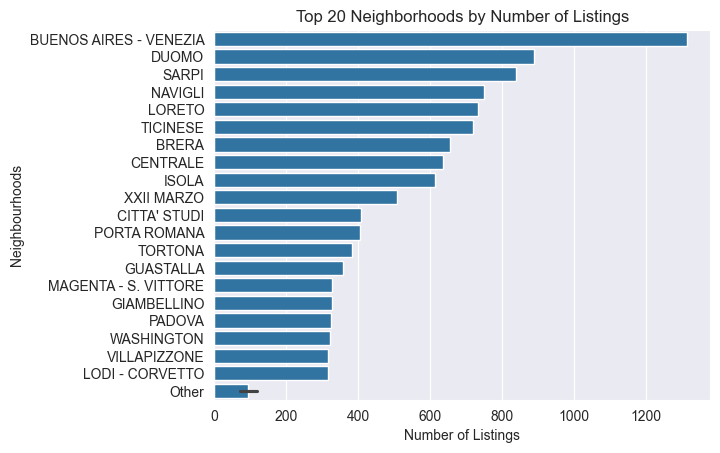

In [282]:
_ = sns.barplot(
    data = neighborhood_counts,
    y = 'grouped_neighbourhood',
    x = 'listing_count'
)
_ = plt.xlabel('Number of Listings')
_ = plt.ylabel('Neighbourhoods')
_ = plt.title('Top 20 Neighborhoods by Number of Listings')
plt.show()

### Price distribution

In [283]:
neighborhood_avg_price = listings.groupby('neighbourhood_cleansed')['price'].mean().reset_index()
neighborhood_avg_price.columns = ['neighbourhood', 'avg_price']
neighborhood_avg_price

,neighbourhood,avg_price
0,ADRIANO,110.655172
1,AFFORI,114.408805
2,BAGGIO,84.081633
3,BANDE NERE,116.958904
4,BARONA,107.222222
...,...,...
81,VIALE MONZA,110.015267
82,VIGENTINA,143.365079
83,VILLAPIZZONE,107.110410
84,WASHINGTON,135.656347


In [284]:
p_prices = folium.Choropleth(
    geo_data=geojson_path,
    data=neighborhood_avg_price,
    columns=['neighbourhood', 'avg_price'],
    key_on='feature.properties.neighbourhood',  # GeoJSON property for matching
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Average price',
    
    highlight= True,
    nan_fill_color="grey",
    name='Average price'
).add_to(milan_map)

# creating a state indexed version of the dataframe so we can lookup values
price_data_indexed = neighborhood_avg_price.set_index('neighbourhood')

# looping thru the geojson object and adding a new property(unemployment)
# and assigning a value from our dataframe
for s in p_prices.geojson.data['features']:
    #print(s['properties'])
    #print(s['properties']['neighbourhood'])
    try: 
        #print(state_data_indexed.loc[s['properties']['neighbourhood'], 'listing_count'])
        s['properties']['average_price'] = int(price_data_indexed.loc[s['properties']['neighbourhood'], 'avg_price'])
        #print(s['properties']['listing_count'])
    except:
        s['properties']['average_price'] = 0
    #print(s['properties'])

folium.GeoJsonTooltip(
    fields=['neighbourhood', 'average_price'],
    aliases=['Neighborhood', 'Average price'],
    labels=True,
    sticky=True,
    style= "background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;"
).add_to(p_prices.geojson)

folium.LayerControl().add_to(milan_map)

milan_map

In [285]:
neighborhood_avg_price = pd.merge(
    neighborhood_avg_price,
    neighborhood_counts,
    on = 'neighbourhood',
    how = 'left'
)

neighborhood_avg_price.sort_values(by = 'listing_count', ascending=False)


,neighbourhood,avg_price,listing_count,top_20,grouped_neighbourhood
10,BUENOS AIRES - VENEZIA,151.365854,1312,1,BUENOS AIRES - VENEZIA
19,DUOMO,213.104612,889,1,DUOMO
70,SARPI,148.632019,837,1,SARPI
42,NAVIGLI,145.096128,749,1,NAVIGLI
36,LORETO,120.874317,732,1,LORETO
...,...,...,...,...,...
41,MUGGIANO,104.500000,4,0,Other
69,SACCO,54.000000,3,0,Other
47,PARCO AGRICOLO SUD,102.333333,3,0,Other
65,RONCHETTO DELLE RANE,71.000000,1,0,Other


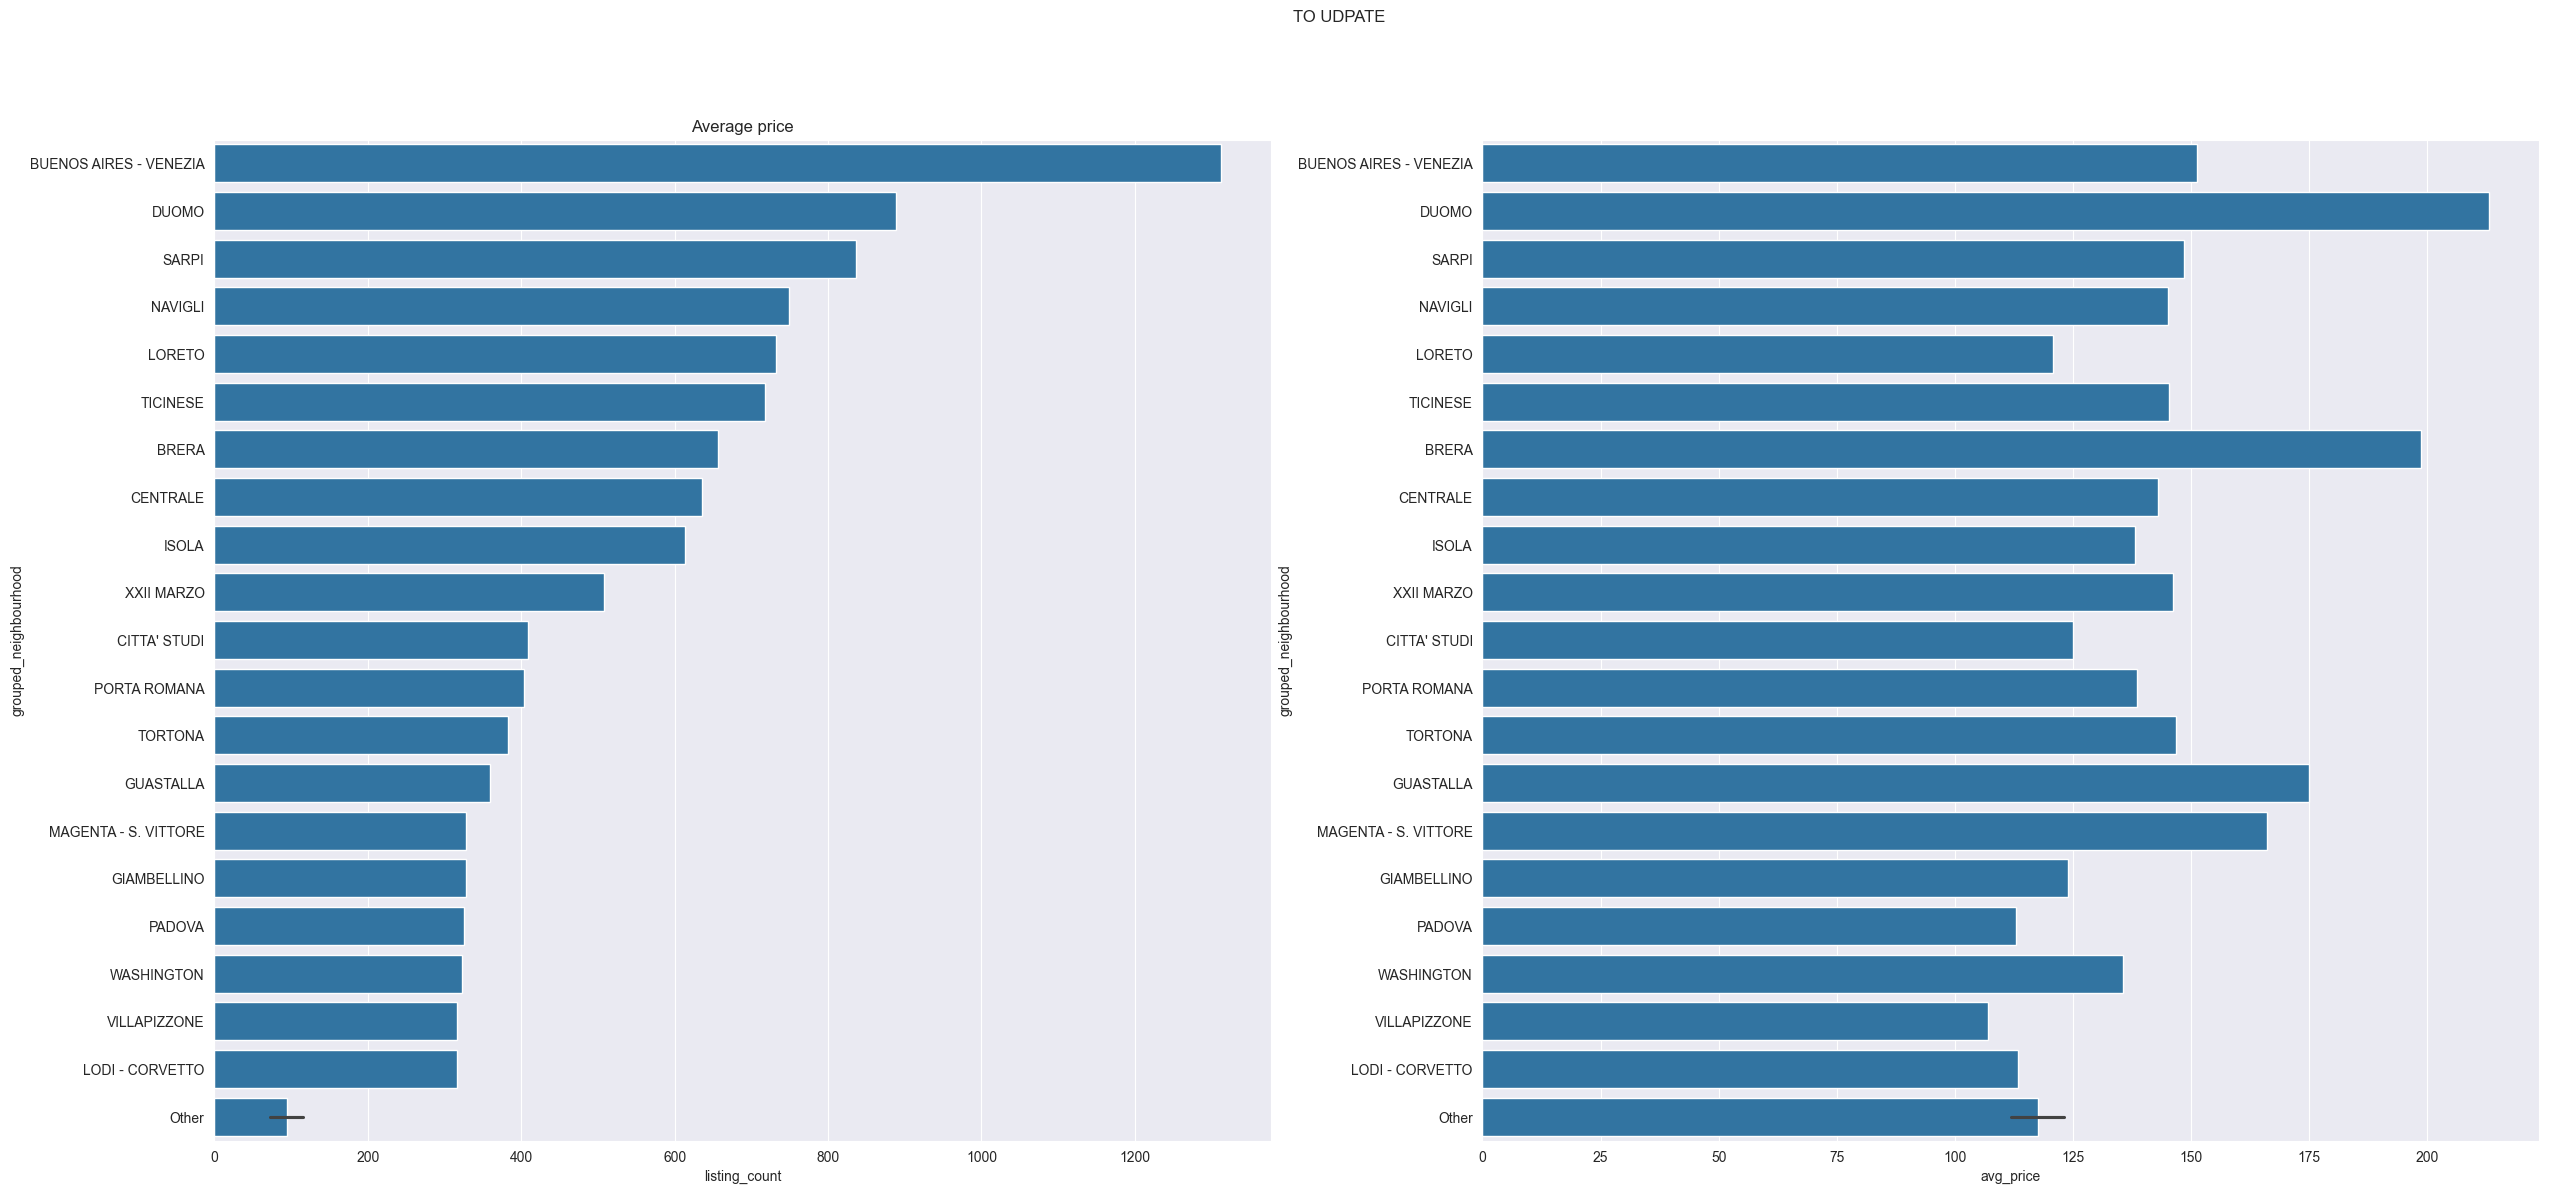

In [286]:
# Define the "subplot".
fig, axes = plt.subplots(
    nrows=1, 
    ncols=2,
    figsize=(30,13)
)

# Set up a stype
sns.set_style("darkgrid")

# Let's add a general title.
fig.suptitle("TO UDPATE")

# Add subtitles to each subplot
axes[0].set_title("Number of listings")
axes[0].set_title("Average price")

sns.barplot(
    data = neighborhood_counts,
    y = 'grouped_neighbourhood',
    x = 'listing_count',
    order = neighborhood_counts.sort_values(
        by = 'listing_count', ascending = False)['grouped_neighbourhood'],
    ax = axes[0]

)

sns.barplot(
    data = neighborhood_avg_price,
    y = 'grouped_neighbourhood',
    x = 'avg_price',
    order = neighborhood_avg_price.sort_values(
        by = 'listing_count', ascending = False)['grouped_neighbourhood'],
    ax = axes[1]
)

plt.show()

### Other determinants of price

In [287]:
listings['bedrooms'].unique()

array([ 1.,  3.,  2.,  4.,  5., 10.,  6., 11.])

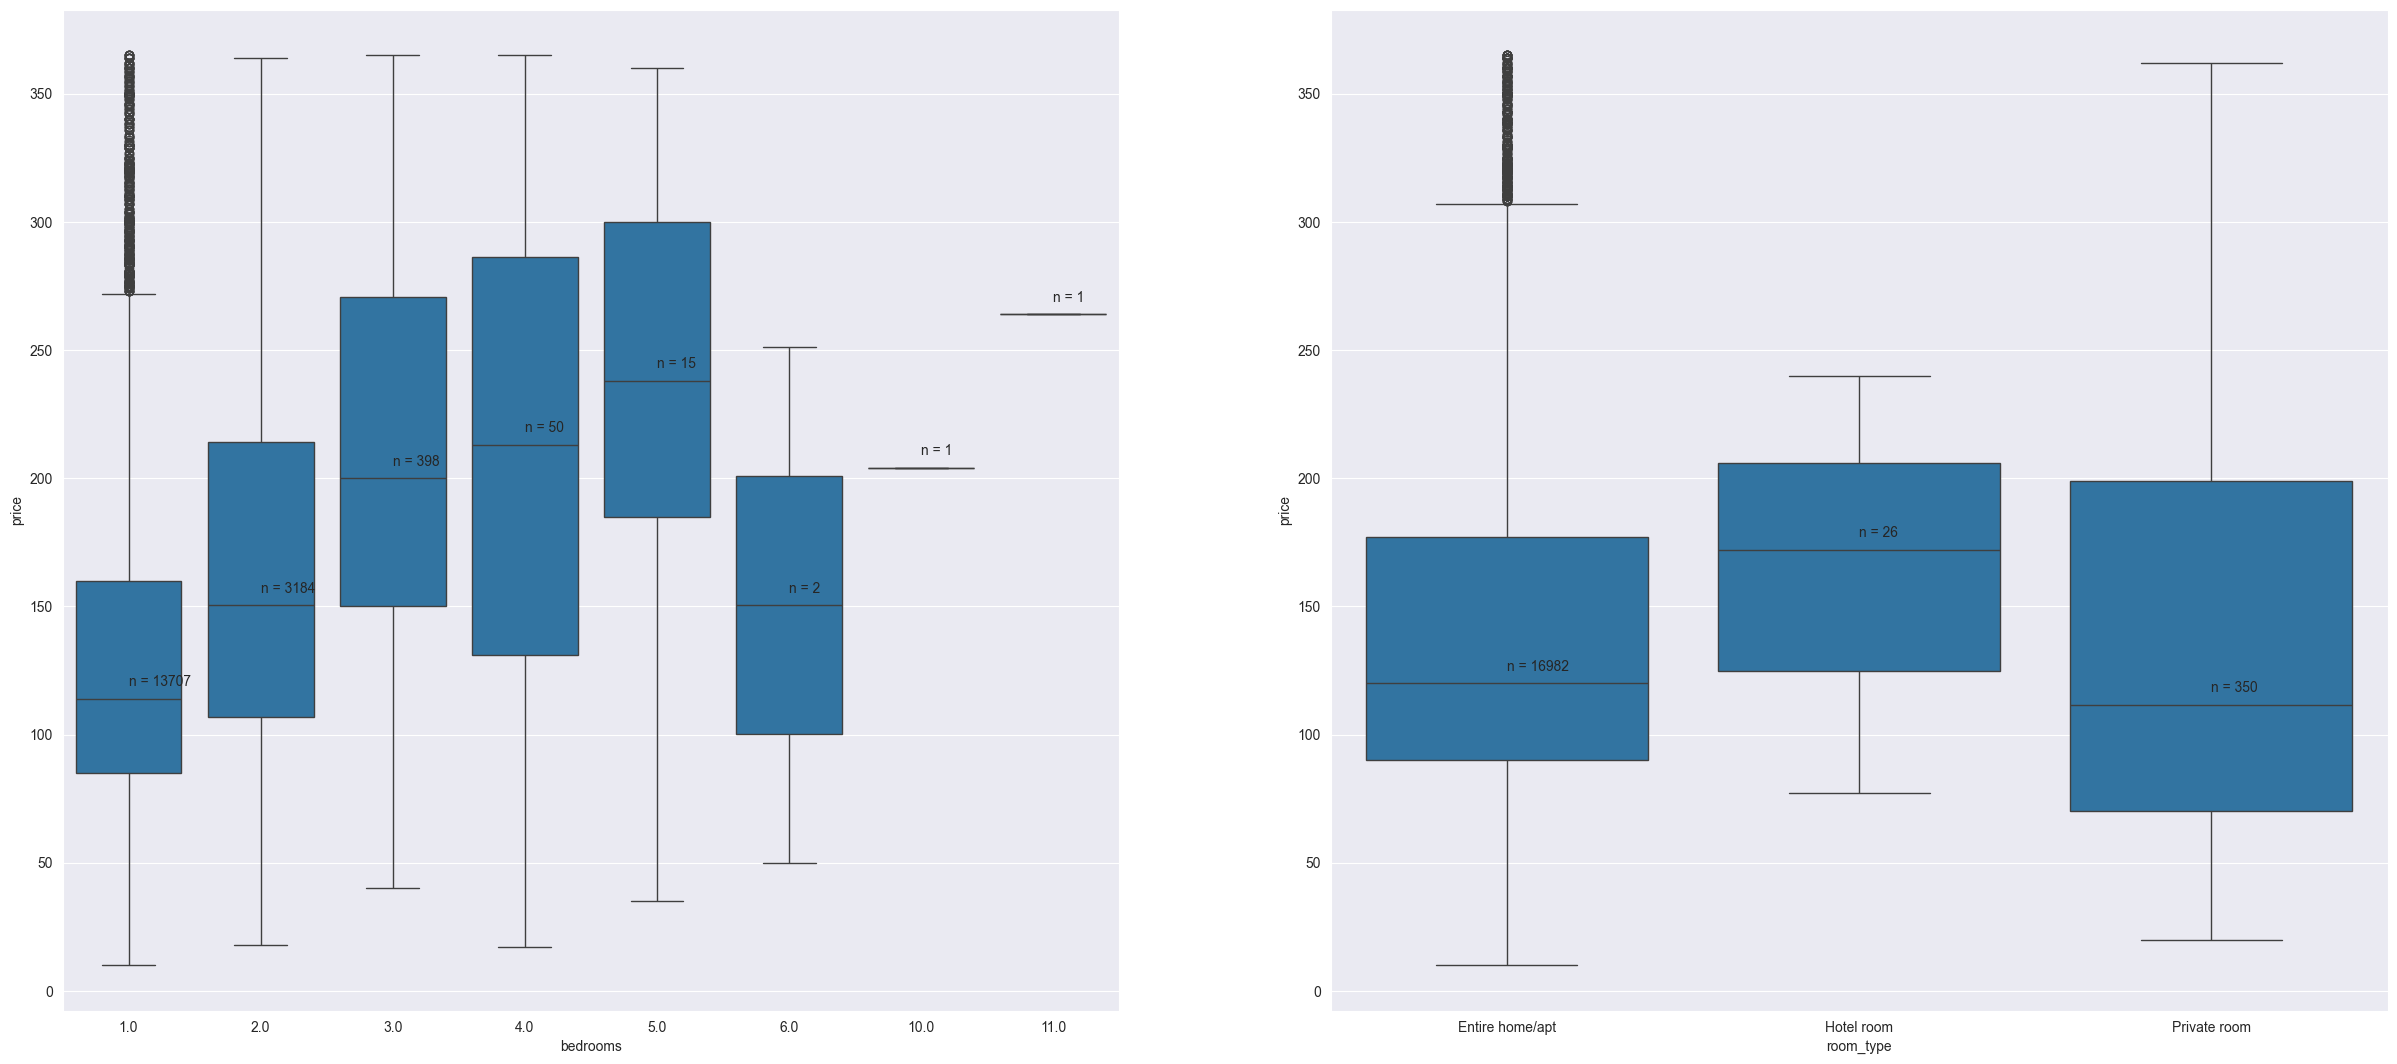

In [295]:
fig, axes = plt.subplots(
    nrows=1, 
    ncols=2,
    figsize=(30,13)
)

#Price by beds
boxplot_axis = sns.boxplot(
    data = listings,
    y = 'price',
    x = 'bedrooms',
    ax = axes[0]
)

x = 0
# Get list of number of bedrooms available
bedrooms_available = np.unique(listings['bedrooms'])

for num_bedrooms in bedrooms_available:
    y = np.median(listings[listings['bedrooms'] == num_bedrooms]['price']) + 5
    nobs = listings[listings['bedrooms'] == num_bedrooms].shape[0]
    text = f"n = {nobs}"
    #print(f"{x} {num_bedrooms} {np.median(listings[listings['bedrooms'] == num_bedrooms]['price'])} {y} {text}")

    boxplot_axis.text(
        x = x,
        y = y,
        s = text
    )
    x +=1

# Get list of number of bedrooms available
bedrooms_available = np.unique(listings['room_type'])
# Price by room type
boxplot_axis = sns.boxplot(
    data = listings,
    y = 'price',
    x = 'room_type',
    ax = axes[1],
    order = bedrooms_available
)

x = 0


for num_bedrooms in bedrooms_available:
    x = np.argmax(bedrooms_available == num_bedrooms)
    y = np.median(listings[listings['room_type'] == num_bedrooms]['price']) + 5
    nobs = listings[listings['room_type'] == num_bedrooms].shape[0]
    text = f"n = {nobs}"
    #print(f"{x} {num_bedrooms} {np.median(listings[listings['room_type'] == num_bedrooms]['price'])} {y} {text}")

    boxplot_axis.text(
        x = x,
        y = y,
        s = text
    )
plt.show()

- first on separate datasets
- what are the min and max data?
- what is the distr of prices of listings?
- have prices changed over time?

### Price and listings over time

In [296]:
mi_listings['date'].describe()

count                          6335507
mean     2024-03-13 12:01:14.385331968
min                2023-09-13 00:00:00
25%                2023-12-13 00:00:00
50%                2024-03-13 00:00:00
75%                2024-06-13 00:00:00
max                2024-09-12 00:00:00
Name: date, dtype: object

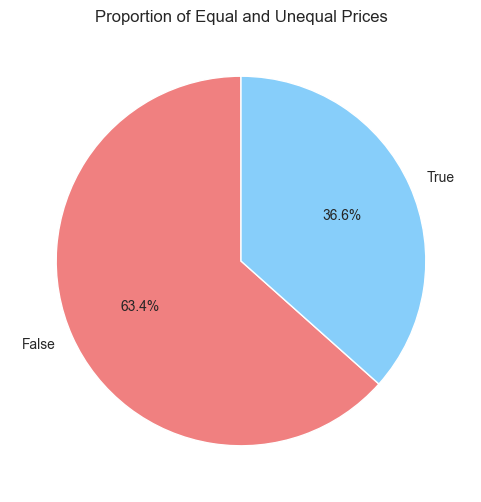

In [300]:
mi_listings['equal_prices'] = mi_listings['price_x'] == mi_listings['price_y']
value_counts = mi_listings['equal_prices'].value_counts(normalize=True)

#
plt.figure(figsize=(6, 6))
plt.pie(
    value_counts, 
    labels=value_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['lightcoral', 'lightskyblue'])
plt.title('Proportion of Equal and Unequal Prices')
plt.show()

<Axes: xlabel='date', ylabel='price_y'>

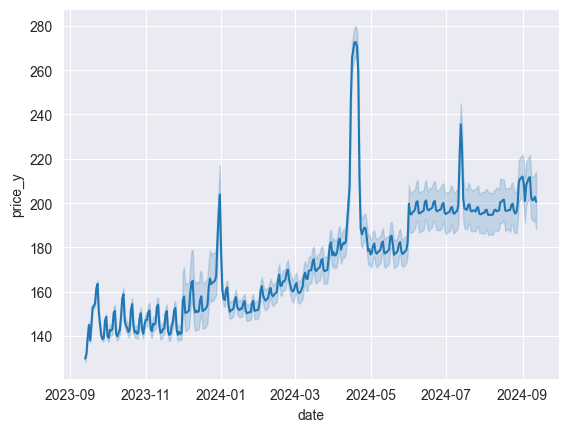

In [297]:
sns.lineplot(
    data = mi_listings,
    x = "date",
    y = "price_y"
)
